# Perlin Noise Practice Book

## Main notebook checkpoints:
1. Research about the problem. See what articles, papers, Python notebooks, demos, etc. other people have created
2. Create a new notebook and document your findings. Include any assumptions, models, formulas, etc. that you're using
3. Implement the algorithm. Try not to copy others' work, rather try to do it on your own using the model you've created
4. Test and improve the algorithm
5. (Optional) Create a cool demo :), e.g. using Perlin noise to simulate clouds. You can even do an animation (hint: you'll need gradients not only in space but also in time)
6. Communicate the results (e.g. in the Softuni forum)

## Main notebook example
- http://adrianb.io/2014/08/09/perlinnoise.html

## Research

Wikipedia page:
- https://en.wikipedia.org/wiki/Perlin_noise

Some Perlin 2D code from GitHub
- https://github.com/pvigier/perlin-numpy/blob/master/perlin_numpy/perlin2d.py

Some Perlin 3D code from GitHub
- https://github.com/pvigier/perlin-numpy/blob/master/perlin_numpy/perlin3d.py

Noisy planet - Perlin Noise in a disk (polar coordinates)
- https://xgarrido.github.io/blog/jupyter/planet/perlin%20noise/2021/01/15/noisy-planet.html

Perlin Jupyter notebook
- https://medium.com/@yvanscher/playing-with-perlin-noise-generating-realistic-archipelagos-b59f004d8401

Some good notebook in C++-like/JavaScript
- https://rtouti.github.io/graphics/perlin-noise-algorithm

Some good notebook in javascript
- https://codelirium.com/article/perlin-noise

Khan Academy's article/course on Perlin Noise
- https://www.khanacademy.org/computing/computer-programming/programming-natural-simulations/programming-noise/a/perlin-noise

Sample Function: Perlin Noise in 3D - PyVista library
- https://docs.pyvista.org/examples/01-filter/sampling_functions_3d.html

Improved Perlin noise  by Ken Perlin
- https://mrl.cs.nyu.edu/~perlin/noise/
- https://mrl.cs.nyu.edu/~perlin/paper445.pdf

The Perlin noise math FAQ by Matt Zucker
- https://web.archive.org/web/20170201233641/https://mzucker.github.io/html/perlin-noise-math-faq.html

Perlin noise Python library
- https://github.com/caseman/noise
- https://pypi.org/project/perlin-noise/

Noise Python library
- https://pypi.org/project/noise/
- https://anaconda.org/conda-forge/noise

Perlin noise usage (NVidia developer articles)
- https://developer.nvidia.com/gpugems/gpugems/part-i-natural-effects/chapter-5-implementing-improved-perlin-noise
- https://developer.nvidia.com/gpugems/gpugems2/part-iii-high-quality-rendering/chapter-26-implementing-improved-perlin-noise

Some very important code/math tips:
- https://www.youtube.com/watch?v=QHdU1XRB9uw
- https://www.youtube.com/watch?v=MJ3bvCkHJtE

Perlin Noise 1 lecture presentation
- https://www.cs.umd.edu/class/spring2019/cmsc425/handouts/CMSC425Day20.pdf

Texture Generator
- https://cpetry.github.io/TextureGenerator-Online/

Perlin's 1997 oscar comments, code
- https://cs.nyu.edu/~perlin/doc/oscar.html

Ken Perlin's presentation on Perlin Noise
- https://web.archive.org/web/20160308151105/http://noisemachine.com/talk1/3.html

Animations in Python with MatPlotLib
- https://www.geeksforgeeks.org/how-to-create-animations-in-python/

Base 64 encoder
- https://www.base64-image.de/

### Implementation examples

#### 2D Implementation with NumPy
- https://stackoverflow.com/questions/42147776/producing-2d-perlin-noise-with-numpy

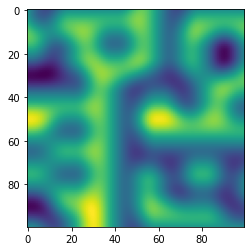

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def perlin(x, y, seed=0):
    # permutation table
    np.random.seed(seed)
    p = np.arange(256, dtype=int)
    np.random.shuffle(p)
    p = np.stack([p, p]).flatten()
    # coordinates of the top-left
    xi, yi = x.astype(int), y.astype(int)
    # internal coordinates
    xf, yf = x - xi, y - yi
    # fade factors
    u, v = fade(xf), fade(yf)
    # noise components
    n00 = gradient(p[p[xi] + yi], xf, yf)
    n01 = gradient(p[p[xi] + yi + 1], xf, yf - 1)
    n11 = gradient(p[p[xi + 1] + yi + 1], xf - 1, yf - 1)
    n10 = gradient(p[p[xi + 1] + yi], xf - 1, yf)
    # combine noises
    x1 = lerp(n00, n10, u)
    x2 = lerp(n01, n11, u)  # FIX1: I was using n10 instead of n01
    return lerp(x1, x2, v)  # FIX2: I also had to reverse x1 and x2 here

def lerp(a, b, x):
    "linear interpolation"
    return a + x * (b - a)

def fade(t):
    "6t^5 - 15t^4 + 10t^3"
    return 6 * t**5 - 15 * t**4 + 10 * t**3

def gradient(h, x, y):
    "grad converts h to the right gradient vector and return the dot product with (x,y)"
    vectors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
    g = vectors[h % 4]
    return g[:, :, 0] * x + g[:, :, 1] * y

lin = np.linspace(0, 5, 100, endpoint=False)
x, y = np.meshgrid(lin, lin)  # FIX3: I thought I had to invert x and y here but it was a mistake

plt.imshow(perlin(x, y, seed=2), origin='upper')
plt.show()

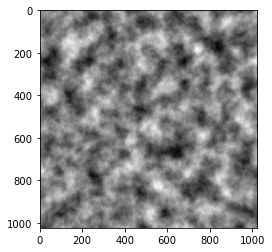

In [10]:
import noise
import numpy as np
import matplotlib.pyplot as plt

shape = (1024, 1024)
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0


creation = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        creation[i][j] = noise.pnoise2(i / scale,
                                    j / scale,
                                    octaves=octaves,
                                    persistence=persistence,
                                    lacunarity=lacunarity,
                                    repeatx=1024,
                                    repeaty=1024,
                                    base=0)

plt.imshow(creation, cmap="gray")
plt.show()

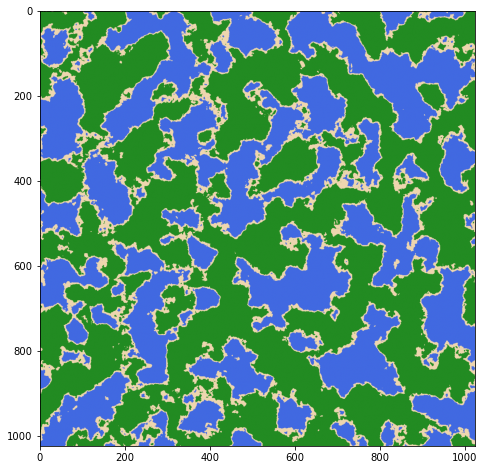

In [9]:
def normalize_rgb(lis):
    return np.array(lis)/255

def color_1(world):
    
    blue = normalize_rgb([65,105,225])
    green = normalize_rgb([34,139,34])
    beach = normalize_rgb([238, 214, 175])
    
    color_world = np.zeros(world.shape+(3,))
    for i in range(shape[0]):
        for j in range(shape[1]):
            if world[i][j] < -0.05:
                color_world[i][j] = blue
            elif world[i][j] < 0:
                color_world[i][j] = beach
            elif world[i][j] < 1:
                color_world[i][j] = green
    return color_world
            
plt.figure(figsize=(8, 8))
plt.imshow(color_1(creation))
plt.show()

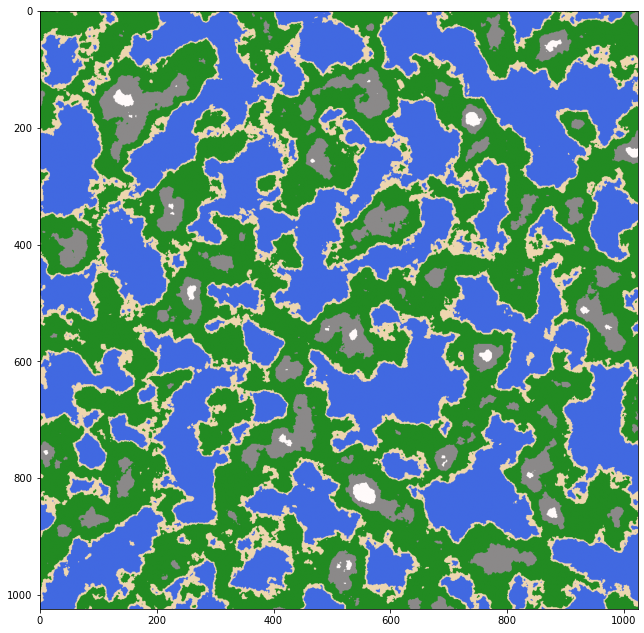

In [7]:
def add_color(world):
    
    blue = normalize_rgb([65,105,225])
    green = normalize_rgb([34,139,34])
    beach = normalize_rgb([238, 214, 175])
    snow = normalize_rgb([255, 250, 250])
    mountain = normalize_rgb([139, 137, 137])
    
    color_world = np.zeros(world.shape+(3,))
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            if world[i][j] < -0.05:
                color_world[i][j] = blue
            elif world[i][j] < 0:
                color_world[i][j] = beach
            elif world[i][j] < 0.2:
                color_world[i][j] = green
            elif world[i][j] < 0.35:
                color_world[i][j] = mountain
            elif world[i][j] < 1.0:
                color_world[i][j] = snow

    return color_world



plt.figure(figsize=(11, 11))
plt.imshow(add_color(creation))
plt.show()


```python
base64_data = ""
display.Image(b64decode(base64_data))
```